In [ ]:
HACER:
- crear /limpiar archivo con las imágenes
- https://docs.github.com/en/github/searching-for-information-on-github/searching-code
- ver el archivo de Untitled. para las uniones de las tablas

In [1]:
# I.
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable

import squarify 
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import re


In [2]:
# II

# Descargo tablas de referencia
lands = pd.read_csv('/home/hmdg/Documents/Data_Science/Repos/Lands/data/ldown_c.csv')
countries_ref = pd.read_csv('/home/hmdg/Documents/Data_Science/Repos/Lands/data/countries_ref.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


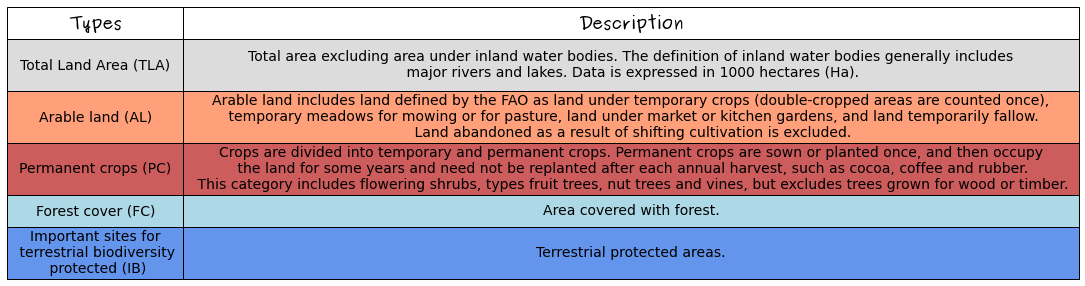

In [3]:
# III

## GRAPHIC THE TABLE WITH THE MEANING OF EACH KIND OF LAND

def desc_table(df):
    ltype = df.type[df.type.str.contains('%|Land ')].unique()

    # Adecuate the strings of types of lands
    lterms=[]
    for n in ltype:
        s = (re.sub("[\(\[].*?[\)\]]", "", n)).strip()
        s = s.replace('Land area', 'Total Land Area')
        words = s.split()
        letters = [word[0].upper().strip() for word in words]
        o = "".join(letters)
        o = o.replace('ISFTBP','IB')
        n = (s+' ('+o+')')
        lterms.append(n)  

        #Spliting the sentence for adequate it to the column width
    lterms[4] = 'Important sites for\n terrestrial biodiversity\n protected (IB)'

    # Manual list with definitions of the type of lands
    t_0 = 'Total area excluding area under inland water bodies. The definition of inland water bodies generally includes\n major rivers and lakes. Data is expressed in 1000 hectares (Ha).'
    t_1 = 'Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once),\n temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow.\n Land abandoned as a result of shifting cultivation is excluded.'
    t_2 = 'Crops are divided into temporary and permanent crops. Permanent crops are sown or planted once, and then occupy\n the land for some years and need not be replanted after each annual harvest, such as cocoa, coffee and rubber.\n This category includes flowering shrubs, types fruit trees, nut trees and vines, but excludes trees grown for wood or timber.'
    t_3 = 'Area covered with forest.'
    t_4 = 'Terrestrial protected areas.'
    
    rows = [[lterms[0],t_0],[lterms[1],t_1],[lterms[2],t_2],[lterms[3],t_3],[lterms[4],t_4]]
    columns = ['Types', 'Description']
    
    color = [["gainsboro","gainsboro"],["lightsalmon","lightsalmon"],["indianred","indianred"],["lightblue","lightblue"],["cornflowerblue","cornflowerblue"]]

    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

    tab = plt.table(colLabels=columns,
                    cellText = rows, 
                    loc='center', 
                    cellColours=color,
                    colWidths = (0.23,1.17),
                    cellLoc = 'center',
                    rowLoc = 'center',
                    bbox = (-0.16,0,1.28,1), 
                   )
    # Changing the fontfamily
    for n in range(len(columns)):
        tab[0,n].set_text_props(fontfamily='Purisa', fontweight='heavy', size=16)
    for n in range(1,(len(rows)+1)):
        for s in range(0,2):
            tab[n,s].set_text_props(size=14)


    # Individual settings
    tab.auto_set_font_size(False)
    tab.set_in_layout(True)
    tab.scale(0.9,5.5) #set the width of the collumns

    # Cell height settings
    cellDict = tab.get_celld()
    for n in range(5):
        l = [0,4,5]
        if n in l:
            cellDict[(n,0)].set_height(0.15)
            cellDict[(n,1)].set_height(0.15)

    plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/desc_table.png')
    return plt.show()

desc_table(lands)

In [4]:
# IV

# Here, there are defined the data frames necessaries for the plots.
# It's neccessary to merge the databases of lands(lands types) and wold (geographic reference) 
# For this, it's used the reference df countries_ref; where are the countries names in both
# format of each df.

lands = lands[lands.year==2016]

# Merge the three tables:
l_c = countries_ref.merge(lands,left_on='name_l', right_on='country')
w_l_c = world.merge(l_c,
                    left_on = world['name'].str.strip().str.lower(), 
                    right_on=l_c['name_w'].str.strip().str.lower()).drop(columns=['name', 'key_0'], axis=1)

## Merge entre la tabla de world y la de country_ref, para obtener los IDs de referencia
worldc = world.copy()
worldc = worldc.rename(columns={'name':'name_w'})
worldc['name_w'] = worldc['name_w'].str.strip().str.lower()
world_m = worldc.merge(countries_ref, on='name_w', left_index=True, how='left').drop('name_l',axis=1)

## Merge entre la tabla de lands y la de referencia de country_ref

landunc = lands.copy()
landunc = landunc.rename(columns={'country':'name_l'}) # Keep all the years data!!!!
landun_m = landunc.merge(countries_ref, on='name_l', left_index=True, how='left')#.drop('name_w',axis=1)
landun_m['name_w']=landun_m['name_w'].str.strip()

# The main reference of stadistics is in 2016 and are in the list of countries
landun_m = landun_m[(landun_m['year'] == 2016) & (landun_m['name_w'].notnull())] 

# Replace the string of types in order of simplify the data
lrep = {'Land area (thousand hectares)':'LA',
        'Arable land (thousand hectares)': 'AL', 'Arable land (% of total land area)':'AL_%',
        'Forest cover (thousand hectares)':'FC', 'Forest cover (% of total land area)':'FC_%',
        'Permanent crops (thousand hectares)':'PC','Permanent crops (% of total land area)':'PC_%',
        'Important sites for terrestrial biodiversity protected (% of total sites protected)':'IB%'}
            
w_l_c['type'] = w_l_c['type'].map(lrep)

landun_m['type'] = landun_m['type'].map(lrep)  

print(landun_m.columns)
# print(landun_m.shape, world_m.shape, w_l_c.shape)
# print(w_l_c.columns, landun_m.columns)

Index(['region', 'name_l', 'year', 'type', 'value', 'footnotes', 'source',
       'general_source', 'name_w'],
      dtype='object')


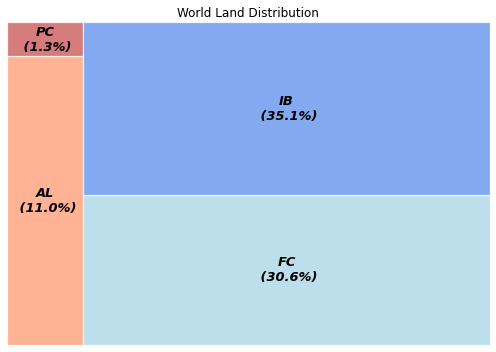

Index(['pop_est', 'continent', 'iso_a3', 'gdp_md_est', 'geometry', 'name_l',
       'name_w', 'region', 'country', 'year', 'type', 'value', 'footnotes',
       'source', 'general_source'],
      dtype='object')

In [5]:
# V --- Adding the relative values - percentage - of every type of land.

# Note: The data of important sites is in percentaje. It's neccesary to change it to 
# absolute values to find the absoluto percentaje.

dprop = w_l_c[['name_w', 'value', 'type']]

dprop = dprop.pivot(columns='type', index='name_w')

dprop.columns= dprop.columns.droplevel()

dprop['IB'] = 0.01 * dprop['IB%']*dprop['LA']

dprop = dprop[['LA', 'AL', 'PC', 'FC', 'IB']].sum()
dprop = pd.DataFrame(dprop)

total_land = dprop.iloc[0].item()

dprop['perc'] = 100 * dprop[0].div(total_land)
dprop = dprop.reset_index()
                
fig = plt.figure(figsize=(7, 5)) 
dprop = dprop.loc[1:]
size = dprop['perc'].to_list() #.sort_values()
labels = dprop.apply(lambda x: str(x['type']) + "\n (" + str(round(x['perc'],1)) + "%)", axis=1) #str(x['type']) + "\n" + 


colors = ['lightsalmon', 'indianred', 'lightblue', 'cornflowerblue']

ax = squarify.plot(sizes=size, alpha=0.8, color=colors, label=labels, #f['leg'], #labels[0], 
              text_kwargs={'fontsize':13, 'family':'sans-serif', 'style':'italic', 'weight':'bold',
                          'multialignment':'center'},
                  bar_kwargs=dict(linewidth=1.2, edgecolor="white"))

plt.title('World Land Distribution')
plt.axis('off')
plt.tight_layout()

plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/squari_dist.png', bbox_inches='tight')
# 
plt.show()

w_l_c.columns


In [6]:

al = w_l_c[['name_l','pop_est','value', 'geometry']][w_l_c['type']=='AL'].reset_index(drop=True)
pc = w_l_c[['value']][w_l_c['type']=='PC'].reset_index(drop=True)
la = w_l_c[['value']][w_l_c['type']=='LA'].reset_index(drop=True)
 

al = al.rename(columns={'value':'value_AL'})
pc = pc.rename(columns={'value':'value_PC'})
la = la.rename(columns={'value':'value_LA'})

o = pd.concat([al, pc, la], axis=1, join='inner')

print(o.shape)
print(o.head())
#print(al.head(10), pc.head(10))
#print(pc.head())

(172, 6)
                     name_l    pop_est  value_AL  \
0                      fiji     920938     165.0   
1   united rep. of tanzania   53950935   13500.0   
2            western sahara     603253       4.0   
3                    canada   35623680   43766.0   
4  united states of america  326625791  152263.0   

                                            geometry  value_PC  value_LA  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...      85.0    1827.0  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...    2150.0   88580.0  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...       NaN   26600.0  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...    4644.0  909351.0  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...    2600.0  914742.0  


In [7]:
# VI

############################################################################
# Making the main indicators with Arable Lands, Permanent Crops and Lands: #
############################################################################

#CL- Cultivable lands
#llist = ['Land area (thousand hectares)','Arable land (thousand hectares)','Permanent crops (thousand hectares)'] 
llist = ['LA','AL','PC'] 

# print(lterms)
# ['Total Land Area (TLA)', 'Arable land (AL)', 
#  'Permanent crops (PC)', 'Forest cover (FC)', 
#  'Important sites for\n terrestrial biodiversity\n protected (IB)']

dcl = landun_m[['name_w', 'type','value']][landun_m['type'].isin(llist)]
dcl = dcl.groupby(['type','name_w']).sum()
dcl = dcl.reset_index(level=['type'])
dcl = dcl.pivot(columns='type', values='value')

dcl['CL'] = dcl['AL']+dcl['PC']
dcl['CL%'] = 100*dcl['CL']/dcl['LA']

dcl = dcl.reset_index(level='name_w')

# Are territors not a country, that's why i took it out
dcl = dcl[~dcl['name_w'].str.contains('falkland is.|n. cyprus')] 

# Linking the Lands tables with the world (geopandas) one
dclw = world_m.merge(dcl, on='name_w', how='inner')

# Percentage of Population Indicator (pop_est%) and density according the Cultivable Lands (density_CL)
dclw['pop_est%'] = 100* dclw['pop_est']/dclw['pop_est'].sum()
dclw['density'] = (dclw['pop_est']/4)/(0.1 + dclw['LA']*1000)
dclw['density_CL'] = (dclw['pop_est']/4)/(0.1+dclw['CL']*1000)

#print(dclw.columns)
# # CL- Cultivable lands
# #dcl = w_l_c[['name_w', 'type','value']][w_l_c['type'].isin(['LA','AL','PC'])]
dcl = landun_m[['name_w', 'type','value']][landun_m['type'].isin(['LA','AL','PC'])]
dcl = dcl.groupby(['type','name_w']).sum()
dcl = dcl.reset_index(level=['type'])
dcl = dcl.pivot(columns='type', values='value')
dcl['CL'] = dcl['AL']+dcl['PC']
dcl['CL%'] = 100*dcl['CL']/dcl['LA']
dcl = dcl.reset_index(level='name_w')

# Are territors not a country, that's why i took it out
dcl = dcl[~dcl['name_w'].str.contains('falkland is.|n. cyprus')] 
print(dcl.shape)
# Linking the Lands tables with the world (geopandas) one
dclw = world.merge(dcl, right_on='name_w', left_on=world['name'].str.strip().str.lower(), how='inner')
# Percentage of Population Indicator (pop_est%) and density according the Cultivable Lands (density_CL)
dclw['pop_est%'] = 100* dclw['pop_est']/dclw['pop_est'].sum()
dclw['density'] = (dclw['pop_est']/4)/(0.1 + dclw['LA']*1000)
dclw['density_CL'] = (dclw['pop_est']/4)/(0.1+dclw['CL']*1000)

dclw.shape

(170, 6)


(170, 15)

/home/hmdg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hmdg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/home/hmdg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



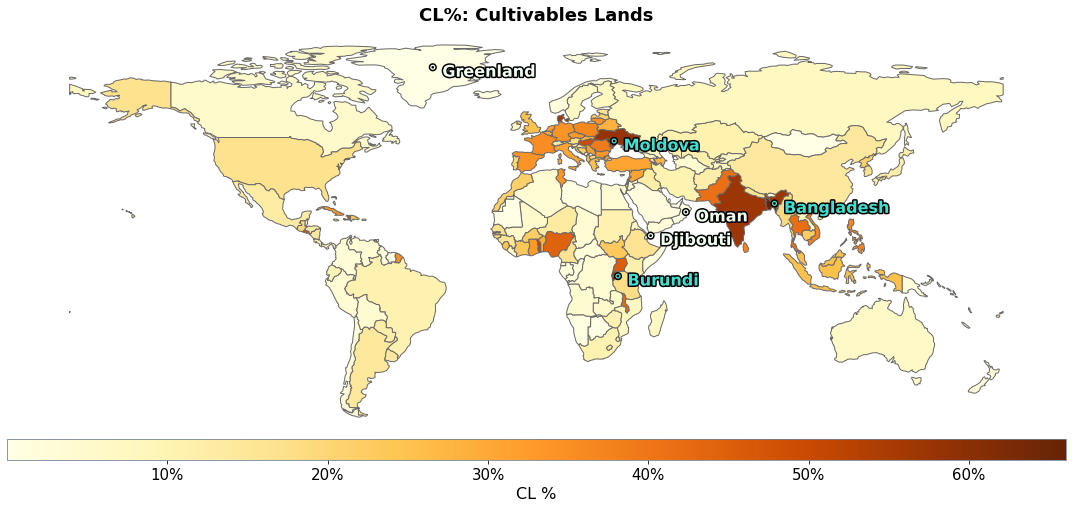

In [43]:
# VII
# ########## Un solo mapa 
%matplotlib inline
#%matplotlib notebook

# plt.style.use('seaborn-deep')#<'Solarize_Light2')
# Setting the rcParams
plt.rcParams.update({'xtick.labelsize':15, 
                     'ytick.labelsize':15,
                     'ytick.labelleft':'off',
                     'ytick.labelright':'off',
                     'xtick.labelbottom':'off',
                     'axes.spines.left': False,
                     'axes.spines.bottom' : False,
                     'axes.spines.top': False,
                     'axes.spines.right':False,
                     'ytick.left':False,
                     'xtick.bottom':False,
                     #'axes.ymargin': 0.5, 
                     #'axes.autolimit_mode': 'round_numbers',
                     'axes.labelsize':16,
                     'axes.grid':False,
                     'axes.edgecolor':'slategrey'
                    })

fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))


divider = make_axes_locatable(ax1)

# Legend bar
cax = divider.append_axes("bottom", size="5%", pad=0.05)

# Plot
ax1 = dclw.plot(column='CL%',
                ax=ax1,
                legend=True,
                edgecolor='dimgray',#white',#dimgrey',
                cmap = 'YlOrBr',#'Greens',# OrRd-rojos',#'RdBu',#'GnBu',#'Wistia',
                cax=cax,
                legend_kwds={'label': "CL %",
                             'orientation': 'horizontal'}
               )

# Adding the percentage to the labels of the legend
s = cax.get_xticks()
labelc = []
[labelc.append(str(int(s[n]))+'%') for n in range(len(s))]
cax.set_xticklabels(labelc)


# Selecting the countries to show
small= ['greenland', 'djibouti', 'oman']
dclwmn = pd.concat([dclw.sort_values(by='CL%').tail(3), dclw[dclw['name_w'].isin(small)]]).reset_index(drop=True)
dclwmn = dclwmn.set_crs("EPSG:4326")



dclwmn['geops'] = gpd.GeoDataFrame(
    geometry = gpd.points_from_xy(dclwmn['geometry'].centroid.x, dclwmn['geometry'].centroid.y),
    crs = "EPSG:4326"
    )


# Adding the names of the selected countries
for place in range(dclwmn.shape[0]):
    if place < 3:
        color = 'turquoise' #'tan' #yellowgreen', #'darkolivegreen',#'forestgreen',#'darkslategray',#','dimgray',#
    else:
        color = 'honeydew'#lightgreen'#'tomato'#'orchid'#'coral'
    ax1.text(dclwmn.geops[place].x,
             dclwmn.geops[place].y-3,
             '\u00B0' + ' ' + dclwmn.loc[place,'name_w'].capitalize(),
             fontsize = 16,#'xx-large',
             fontweight = 'bold',
             color = color,
             path_effects=[path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()])
    

ax1.set_title('CL%: Cultivables Lands', fontsize=18, fontweight = 'bold')
# ax1.patch.set_facecolor('aliceblue')#lightgrey')
plt.tight_layout()

plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/CL_01.png', bbox_inches='tight')

plt.show()


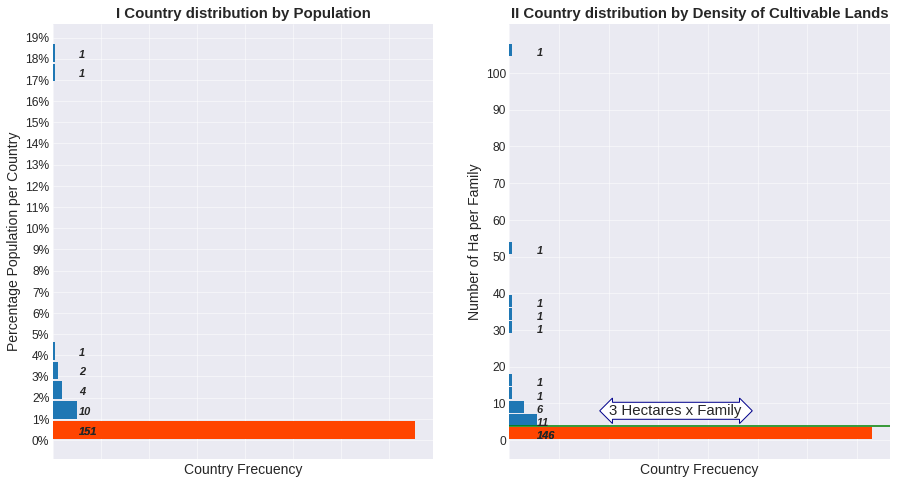

In [10]:
# IIX Histogram division

fig = plt.figure(figsize=(15,8))

plt.rcParams.update({'xtick.labelsize':12,  # plt.rcParams['xtick.labelsize']=14
                     'ytick.labelsize':12, # plt.rcParams['ytick.labelsize']=14
                     'ytick.labelleft':'on', # plt.rcParams['ytick.labelleft']=True
                     'ytick.labelright':'off',
                     'xtick.labelbottom':'off',
                     'axes.spines.left': False,  # plt.rcParams['axes.spines.left'] =False
                     'axes.spines.bottom' : False, # plt.rcParams['axes.spines.bottom'] =False
                     'axes.spines.top': False, # plt.rcParams['axes.spines.top'] =False
                     'axes.spines.right':False, # plt.rcParams['axes.spines.right'] =False
                     'ytick.left':False, # plt.rcParams['ytick.left'] =False
                     'xtick.bottom':False, # plt.rcParams['xtick.bottom'] =False
                     'xtick.top': False, # plt.rcParams['xtick.top'] =False
                     'axes.labelsize':14,
                     'axes.edgecolor':'slategrey',
                     'grid.linewidth':0.5
                    })

plt.style.use('seaborn-darkgrid') #) # 'Solarize_Light2''seaborn-deep'


#### GRAPH 1 ####
ax3 = fig.add_subplot(1,2,1)

ax3.set_ylabel('Percentage Population per Country')
ax3.set_xlabel('Country Frecuency')
ax3.set_title('I Country distribution by Population', weight='bold', size=15)

a_bins = 20
ax3, bins, patches3 = plt.hist(dclw['pop_est%'],
                               bins= a_bins, orientation='horizontal', rwidth=0.9) #a_bins, , range=(0,20)
patches3[0].set_fc('orangered')
plt.yticks(np.arange(0, 20, 1))

# Y axe in percentaje
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

# # Adding the value of each bar (plot1)
high = 0.2
texto = lambda t: plt.text(11, high + t.xy[1], int(t.get_width()),size=11, 
                           fontweight='bold', fontstyle='oblique')
vfunc = np.vectorize(texto)

## Filter the 0 width columns (plot1)
p1 = [patches3[i] for i in range(len(patches3)) if patches3[i].get_width() > 0]
vfunc(p1)

#### GRAPH 2 ####
b_bins = 30
ax4 = fig.add_subplot(1,2,2)
ax4.set_ylabel('Number of Ha per Family') #Population Density')
ax4.set_xlabel('Country Frecuency')
ax4.set_title('II Country distribution by Density of Cultivable Lands', weight='bold', size=15)

ax4, bins, patches4 = plt.hist(dclw['density_CL'],  orientation='horizontal', bins= b_bins,
                            range= None, rwidth=0.9, bottom=0) 


plt.text(40, 3 + patches4[1].xy[1], str(int(patches4[1].xy[1]))+' Hectares x Family', fontsize=15 ,
         bbox=dict(boxstyle='darrow,pad=0.1', fc='white', ec='darkblue'))#square,pad=0.1

[patches4[n].set_fc('orangered') for n in range(len(patches4)) if patches4[n].xy[1] < 1]

# # Adding the value of each bar (plot2)
high = 0.02
p2 = [patches4[i] for i in range(len(patches4)) if patches4[i].get_width() > 0]
vfunc(p2)

plt.axhline(y=patches4[1].xy[1], color='green') # Adding the reference line
plt.yticks(np.arange(0, 110, 10)) # Changing the y steps
patches4[0].set_fc('orangered')

plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/hist_dens.png')

plt.show()


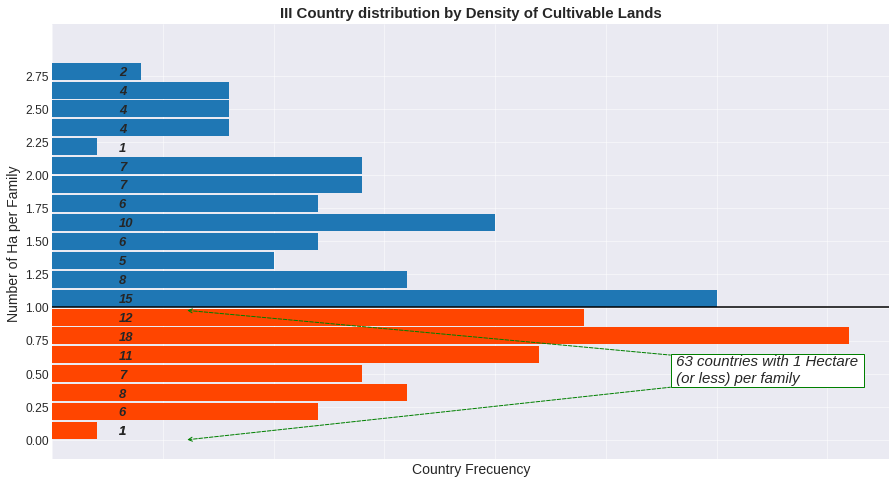

In [11]:
# IX Histogram 

fig = plt.figure(figsize=(15,8))

plt.rcParams.update({'xtick.labelsize':12,  # plt.rcParams['xtick.labelsize']=14
                     'ytick.labelsize':12, # plt.rcParams['ytick.labelsize']=14
                     'ytick.labelleft':'on', # plt.rcParams['ytick.labelleft']=True
                     'ytick.labelright':'off',
                     'xtick.labelbottom':'off',
                     'axes.spines.left': False,  # plt.rcParams['axes.spines.left'] =False
                     'axes.spines.bottom' : False, # plt.rcParams['axes.spines.bottom'] =False
                     'axes.spines.top': False, # plt.rcParams['axes.spines.top'] =False
                     'axes.spines.right':False, # plt.rcParams['axes.spines.right'] =False
                     'ytick.left':False, # plt.rcParams['ytick.left'] =False
                     'xtick.bottom':False, # plt.rcParams['xtick.bottom'] =False
                     'xtick.top': False, # plt.rcParams['xtick.top'] =False
                     'axes.labelsize':14,
                     'axes.edgecolor':'slategrey',
                     'grid.linewidth':0.5
                    })

plt.style.use('seaborn-darkgrid') #) # 'Solarize_Light2''seaborn-deep'

### Graph 5

a_bins = 21
ax5, bins, patches5 = plt.hist(dclw['density_CL'],  orientation='horizontal', bins= a_bins,
                            range= (0, 3), rwidth=0.9) 

plt.ylabel('Number of Ha per Family ')
plt.xlabel('Country Frecuency')
plt.title('III Country distribution by Density of Cultivable Lands', weight='bold', size=15)
plt.yticks(np.arange(0, 3, 0.25))

count_width = 0
for f in range(0,7):
    patches5[f].set_fc('orangered'),
    count_width += int(patches5[f].get_width())
    
# # Adding the value of each bar 
high = 0.03
texto = lambda t: plt.text(1.5, high + t.xy[1], int(t.get_width()),size=13, 
                           fontweight='bold', fontstyle='oblique')
vfunc = np.vectorize(texto)

## Filter the 0 width columns 
p1 = [patches5[i] for i in range(len(patches5)) if patches5[i].get_width() > 0]
vfunc(p1)

# Adding the text box
plt.text(14, patches5[3].xy[1], ' ' + str(count_width) + ' countries with 1 Hectare \n (or less) per family', 
         fontsize=15, fontstyle='oblique',
         bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='green'))#'darrow,pad=0.1' square,pad=0.1

plt.axhline(y=patches5[7].xy[1], color='black') # Adding the reference line
plt.annotate("", xy=(14, 0.40), xytext=(3, 0),  arrowprops=dict(arrowstyle="<-", lw= 1, linestyle='--', color='green'))
plt.annotate("", xy=(14, 0.64), xytext=(3, 0.98),  arrowprops=dict(arrowstyle="<-", lw= 1, linestyle='--', color='green'))


plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/hist_dens_CL.png')
plt.show()


In [16]:
# X

# Cuenta completa
CL_TOTAL = 1000 * dclw['CL'].sum()
POP_MUN = dclw['pop_est'].sum()
FAM_MUN = POP_MUN/4

#========================================
LpP = CL_TOTAL/FAM_MUN
print(LpP)
#========================================

print('pop_mun: ',POP_MUN,  'fami: ',FAM_MUN , ' CL: ', CL_TOTAL)


print( 'Esto es: hay  %s Ha por 4 personas... aprox por familia :-S ' %LpP)
print( 'deberia ser 1; faltarian ' , FAM_MUN - CL_TOTAL, 
      ' Ha para llegar a lo minimo necesario para el planeta,\n ' )



0.8717649650188034
pop_mun:  7353913563 fami:  1838478390.75  CL:  1602721049.9999998
Esto es: hay  0.8717649650188034 Ha por 4 personas... aprox por familia :-S 
deberia ser 1; faltarian  235757340.75000024  Ha para llegar a lo minimo necesario para el planeta,
 


In [17]:
# XI

#  Set up the matplotlib figure
ref_val = 1 #---->> Valor de referencia de Ha!!!!

dclw['LpP'] = (4000) * dclw['CL']/dclw['pop_est']
dclw['ref'] = dclw['LpP'] - ref_val
dclw = dclw.sort_values(by=['continent', 'ref']).reset_index(drop=True)
dclw['name_w']= dclw['name_w'].str.capitalize()

# Indicador de haref
dclw['ind'] = dclw['LpP'].apply(lambda x: 'over' if x >=ref_val else 'under')
dclw[dclw['ind']=='over'].count(), dclw[dclw['ref']<0].count()


(pop_est       63
 continent     63
 name          63
 iso_a3        63
 gdp_md_est    63
 geometry      63
 name_w        63
 AL            63
 LA            63
 PC            63
 CL            63
 CL%           63
 pop_est%      63
 density       63
 density_CL    63
 LpP           63
 ref           63
 ind           63
 dtype: int64, pop_est       107
 continent     107
 name          107
 iso_a3        107
 gdp_md_est    107
 geometry      107
 name_w        107
 AL            107
 LA            107
 PC            107
 CL            107
 CL%           107
 pop_est%      107
 density       107
 density_CL    107
 LpP           107
 ref           107
 ind           107
 dtype: int64)

                     LpP          %
continent     ind                  
Africa        over    22  44.000000
              under   28  56.000000
Asia          over     6  13.333333
              under   39  86.666667
Europe        over    21  55.263158
              under   17  44.736842
North America over     5  27.777778
              under   13  72.222222
Oceania       over     3  42.857143
              under    4  57.142857
South America over     6  50.000000
              under    6  50.000000


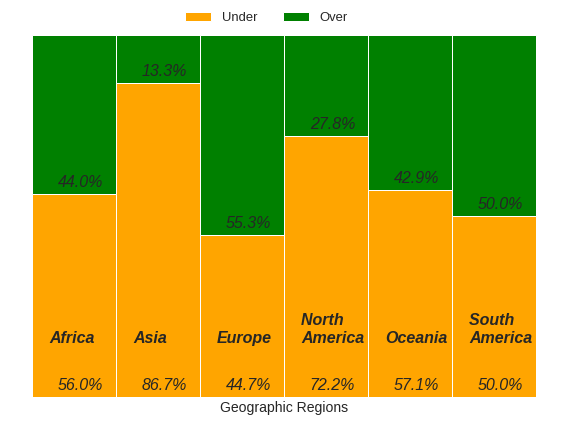

In [58]:
# XII
# Valores resumen mundiales

plt.rcParams.update({'ytick.labelleft':'off',
                    })

r = dclw['continent'].unique()

coli = ['continent', 'ind', 'LpP']
pv = dclw[coli]
pv = pv.groupby(['continent','ind']).count()
pv['%'] = pv.groupby(level=0).apply(lambda x:  100*x / x.sum())
print(pv)
fig= plt.figure(figsize=(8,6))

# Defino los grupos a graficar según 'over' or 'under'
overbar = pv['%'][pv.index.isin(['over'], level=1)].to_list()
underbar = pv['%'][pv.index.isin(['under'], level=1)].to_list()

# Defino parámetros del gráfico
barWidth = 1

# Create over bars
nu = plt.bar(r, underbar, color='orange', edgecolor='white', width=barWidth, label="Under")
no = plt.bar(r, overbar, bottom=underbar, color='green', edgecolor='white', width=barWidth, label="Over" )

plt.box(on=None)

# Custom x axis
plt.xticks(r, dclw['continent'].unique())
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel("Geographic Regions")

# Add a legend
plt.legend(ncol=2, fontsize=13, bbox_to_anchor=(0.3,0.95)) #loc='upper center', 

# In order of print the names of the regions
r[3]='North \nAmerica'
r[5]='South \nAmerica'

for n in range(6):
    plt.text(nu.patches[n].xy[0]+0.3, nu.patches[n].xy[1]+2, str(round(underbar[n],1))+'%', fontsize=16, fontstyle='oblique')
    plt.text(no.patches[n].xy[0]+0.3, no.patches[n].xy[1]+2, str(round(overbar[n],1))+'%', fontsize=16, fontstyle='oblique')
    plt.text(nu.patches[n].xy[0]+0.2, nu.patches[n].xy[1]+15, r[n], fontsize=16, fontstyle='oblique', weight='bold')
    
# Y axis in percentage
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)


# To fix the plot size to the layout 
plt.tight_layout()

# Show graphic
plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/HpF_bars.png')#, bbox_inches='tight')

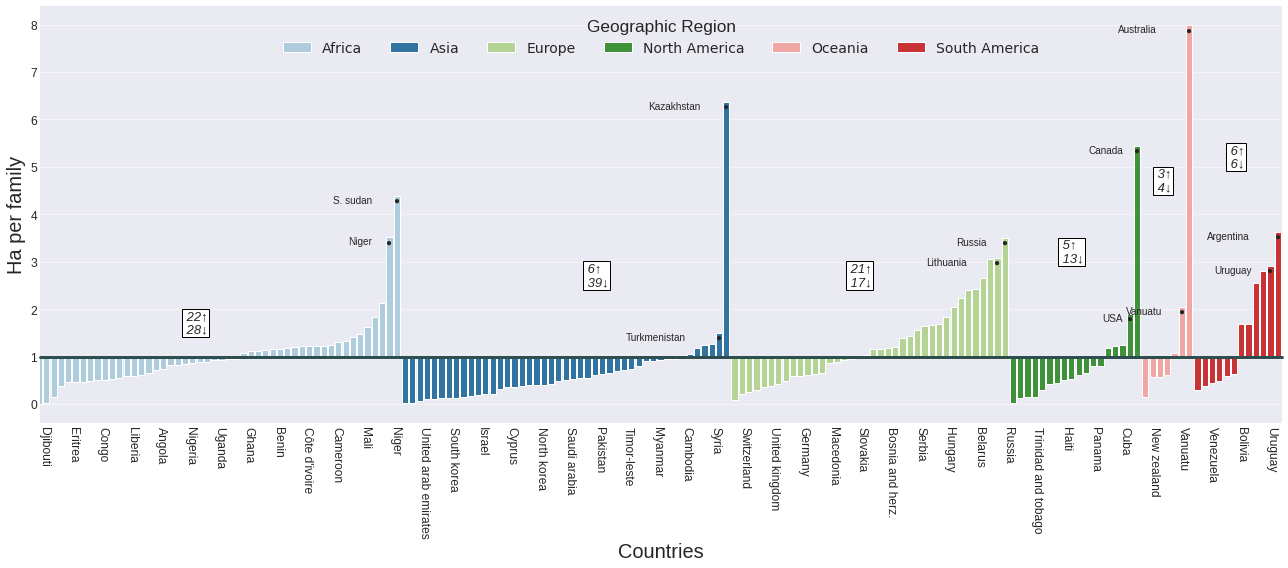

In [43]:
# XIII

# # SEABORN

plt.rcParams.update({'xtick.labelbottom':'on',
                    'ytick.labelleft':'on'})

fig= plt.figure(figsize=(18,8)) # width, height in inches -> 

with sns.axes_style("darkgrid"):
    bx = sns.barplot(x='name_w', y="ref", data=dclw, hue='continent', bottom=ref_val
                     , palette="Paired", edgecolor=None)

# Create the list of patches not nulls, for the x axis values.
def patches(bxs):
    patches_heights = []
    for n in range(len(bxs.patches)):
        if (bxs.patches[n].get_height() <0 or bxs.patches[n].get_height() >0):
            s = bxs.patches[n].get_x()
            patches_heights.append(s)
    patches_heights = pd.DataFrame(patches_heights, columns=['xaxis'])
    return(patches_heights)

pop_axis = pd.concat([dclw, patches(bx)], axis=1)

pop_axis['name_w'] = pop_axis['name_w'].replace('United states of america','USA') 

# Selection of the two first countries for every geo. region named in the plot
popg = pop_axis.groupby(['continent','name_w']).max()
popg = popg[['LpP', 'xaxis']].sort_values(by=['continent','LpP'], ascending=False)

l_pays = []
[l_pays.append(popg.loc[p][:2].index[s]) for s in range(2) for p in pop_axis['continent'].unique()]


# Function to chanche the with of the bars. Its necessary iterate over the patches values.
def change_width(bxs, new_value) : 
    for patch in bxs.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff)

width = 0.85
change_width(bx, width)

# Putting the names of the selected countrys in the plot
def text_c(df,bxs,t):
    ls = []
    if t=='mark':
        for n in l_pays:
            o = bxs.text(float(df['xaxis'][df['name_w']==n])-width, float(df['LpP'][df['name_w']==n]-0.15)
                     ,'\u25CF', fontweight='extra bold', rotation=0) #\u00B0 '\u03BF' , fontsize=30
            ls.append(o) 

    else:
        for n in l_pays:
            o = bxs.text(float(df['xaxis'][df['name_w']==n])-len(n)-1, float(df['LpP'][df['name_w']==n]-0.15)
                     ,n , rotation=0)
            ls.append(o)        
    return ls

text_c(pop_axis,bx,'mark')
text_c(pop_axis,bx,'name')


# Setting the figure 
bx.axhline(ref_val, color="darkslategray", lw=3, clip_on=False)

bx.tick_params(labelsize=12)
bx.set_xlabel("Countries", fontsize=20)
bx.set_ylabel("Ha per family", fontsize=20)

bx.set_xticklabels([bx.get_xticklabels()[n] for n in range(0,dclw.shape[0])], rotation=-90)
bx.set_xticks([bx.get_xticks()[n] for n in range(0, dclw.shape[0], 4)])

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='ultralight',
                                   style='normal', 
                                   stretch='ultra-condensed',
                                   size=14)

bx.legend(title='Geographic Region',loc= 'upper center',# bbox_to_anchor=(0.0005,1.04,1,0.1),#0.001
          frameon=False, prop=font, title_fontsize='xx-large', ncol=6)

# In order to get the values every continent
pp = pop_axis.groupby(['continent', 'ind']).count()
pp = pp.reset_index(level=['ind']).pivot(columns='ind', values='LpP')
pp['total'] = pp['over']+pp['under']
lc = [(pp.loc[n][0], pp.loc[n][1]) for n in pop_axis.continent.unique()]

def text_sum(t1, t2, x, y):
    plt.text(x, y, ' '+t1+'\u2191\n '+t2 +'\u2193',
    fontsize=13, fontstyle='oblique',
    bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='black'))

        
text_sum(str(lc[0][0]), str(lc[0][1]), 22-3, 1.5)    
text_sum(str(lc[1][0]), str(lc[1][1]), 50+39-15, 2.5)
text_sum(str(lc[2][0]), str(lc[2][1]), 50+46+17-3, 2.5)
text_sum(str(lc[3][0]), str(lc[3][1]), 50+46+38+5, 3)
text_sum(str(lc[4][0]), str(lc[4][1]), 50+46+38+18+3-3, 4.5)
text_sum(str(lc[5][0]), str(lc[5][1]), 50+46+38+18+7+6-3, 5)


plt.tight_layout()

# # Show graphic

plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/ha_ref.png', bbox_inches='tight')


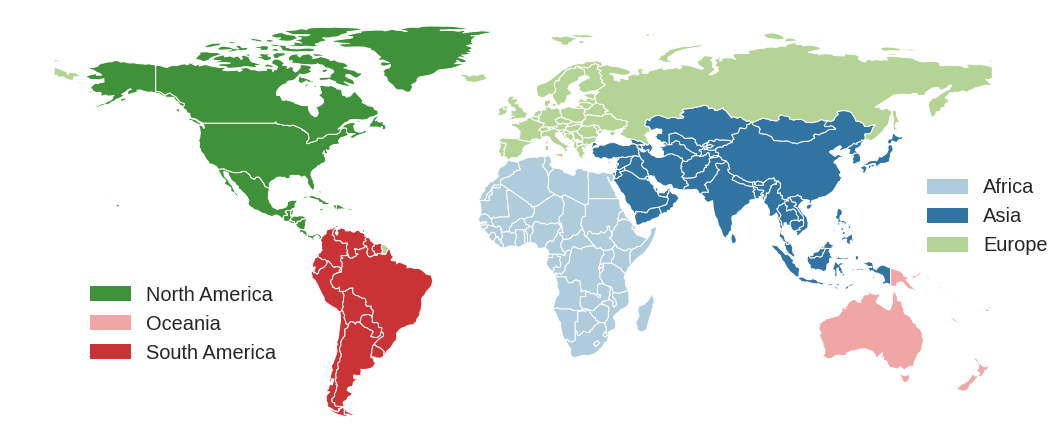

In [44]:
# XIV

# Taking the color reference of the previous plot

plt.rcParams.update({#'xtick.labelsize':15, 
                     #'ytick.labelsize':15,
                     'ytick.labelleft':'off',
                     'ytick.labelright':'off',
                     'xtick.labelbottom':'off',
                     'axes.spines.left': False,
                     'axes.spines.bottom' : False,
                     'axes.spines.top': False,
                     'axes.spines.right':False,
                     'ytick.left':False,
                     'xtick.bottom':False,
                     #'axes.ymargin': 0.5, 
                     #'axes.autolimit_mode': 'round_numbers',
                     #'axes.labelsize':16,
                     #'axes.grid':False,
                     #'axes.edgecolor':'slategrey'
                    })

def colors(bxs):
    patches_colors = []
    for n in range(len(bxs.patches)):
        if (bxs.patches[n].get_height() <0 or bxs.patches[n].get_height() >0):
            s = bxs.patches[n].get_facecolor()
            patches_colors.append([s])
    patches_colors = pd.DataFrame(patches_colors, columns=['color'])
    return(patches_colors)

pop_color = pd.concat([dclw, colors(bx)], axis=1)
c_list = pop_color['color'].unique()

# Creating/setting the plot
fig, cx1 = plt.subplots(1, 1, figsize=(15, 15))

pop_color = pop_color.to_crs("EPSG:4326")#3035")#"EPSG:")4326

cont_l = pop_color.continent.unique()

for c in range(len(cont_l)):
    cx1 = pop_color[pop_color["continent"] == cont_l[c]].plot(ax=cx1, color=c_list[c], 
                                        legend=True,
                                        edgecolor='white')

cx1.patch.set_facecolor('white')

## Adding the legend
patchList = []
for k in range(len(pop_color['color'].unique())):
        data_color = mpatches.Patch(color=pop_color['color'].unique()[k], 
                                  label=pop_color['continent'].unique()[k])
        patchList.append(data_color)


l1 = plt.legend(handles=patchList[3:6], ncol=1, loc='lower center', bbox_to_anchor=(0.17,0.13), fontsize=20)
l2 = plt.legend(handles=patchList[:3], ncol=1, loc='lower center', bbox_to_anchor=(0.95,0.38), fontsize=20)
plt.gca().add_artist(l1)

plt.tight_layout()

plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/world_map.png', bbox_inches='tight')
plt.show()
